# Networks: structure, evolution & processes
**Internet Analytics - Lab 2**

---

**Group:** *S*

**Names:**

* *Adam Cohen*
* *Stefan Peters*
* *Alexandre Spiess*
* *Tom Oliver Martin Vrakking*

---

#### Instructions

*This is a template for part 4 of the lab. Clearly write your answers, comments and interpretations in Markodown cells. Don't forget that you can add $\LaTeX$ equations in these cells. Feel free to add or remove any cell.*

*Please properly comment your code. Code readability will be considered for grading. To avoid long cells of codes in the notebook, you can also embed long python functions and classes in a separate module. Don’t forget to hand in your module if that is the case. In multiple exercises, you are required to come up with your own method to solve various problems. Be creative and clearly motivate and explain your methods. Creativity and clarity will be considered for grading.*

---

## 2.4 PageRank

### 2.4.1 Random Surfer Model

#### Exercise 2.12

Components graph PageRank:
{0: 0.2862, 1: 0.2862, 2: 0.2862, 3: 0.1414, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0}
Absorbing graph PageRank:
{0: 0.1403, 1: 0.3524, 4: 0.1424, 2: 0.1477, 3: 0.2172}


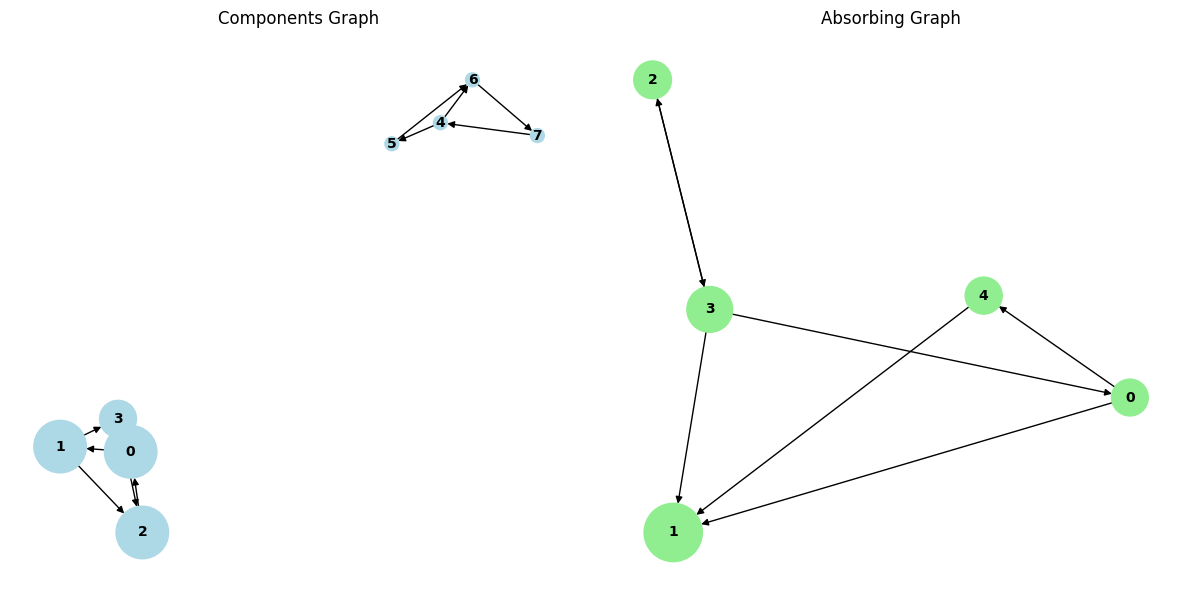

In [8]:
### Answers to the question:
# The random surfer never visits nodes 4, 5, 6 & 7. This breaks the PageRank for those nodes (get a score of 0).

### Results:
# components:
# ({0: 0.2848, 1: 0.2847, 2: 0.2847, 3: 0.1458, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0})

# absorbing:
#  ({0: 0.1477, 1: 0.3642, 4: 0.1495, 2: 0.132, 3: 0.2066})

### Code:


# Import our own methods, they are in a separate file as they're quite long
from part4_helper_methods import *


def random_surfer(G, num_steps=10000): # I hardcoded the number of steps, sue me :p
    nodes = list(G.nodes())
    visit_count = {node: 0 for node in G.nodes()}
    current_node = np.random.choice(G.nodes())

    for _ in range(num_steps):
        visit_count[current_node] += 1
        neighbors = list(G.successors(current_node))
        if neighbors:
            current_node = np.random.choice(neighbors)
        else:
            current_node = np.random.choice(nodes)

    total_visits = sum(visit_count.values()) # TODO remove the assignment? Python is weird...
    pagerank = {node: count / num_steps for node, count in visit_count.items()}
    return visit_count, pagerank

# Run for components graph
components_graph = load_graph("../../ix-lab2-files-2025/data/components.graph")
components_results = random_surfer(components_graph)
components_pagerank = components_results[1]  # Extract the pagerank dictionary
print("Components graph PageRank:")
print(components_pagerank)

# Run for absorbing graph
absorbing_graph = load_graph("../../ix-lab2-files-2025/data/absorbing.graph")
absorbing_results = random_surfer(absorbing_graph)
absorbing_pagerank = absorbing_results[1]  # Extract the pagerank dictionary
print("Absorbing graph PageRank:")
print(absorbing_pagerank)

# Visualizing the graphs
plt.figure(figsize=(12, 6))

plt.subplot(121)
nx.draw(components_graph, with_labels=True, node_color='lightblue',
        node_size=[max(v*5000, 100) for v in components_pagerank.values()], # This is a fancy way of making the bubble size proportional to the PageRank
        font_size=10, font_weight='bold')
plt.title("Components Graph")

plt.subplot(122)
nx.draw(absorbing_graph, with_labels=True, node_color='lightgreen',
        node_size=[max(v*5000, 100) for v in absorbing_pagerank.values()],
        font_size=10, font_weight='bold')
plt.title("Absorbing Graph")

plt.tight_layout()
plt.show()

#### Exercise 2.13

Components graph PageRank:
{0: 0.13965, 1: 0.13775, 2: 0.14284, 3: 0.07762, 4: 0.13874, 5: 0.07828, 6: 0.14432, 7: 0.1408}
Absorbing graph PageRank:
{0: 0.14727, 1: 0.33929, 4: 0.14994, 2: 0.14911, 3: 0.21439}


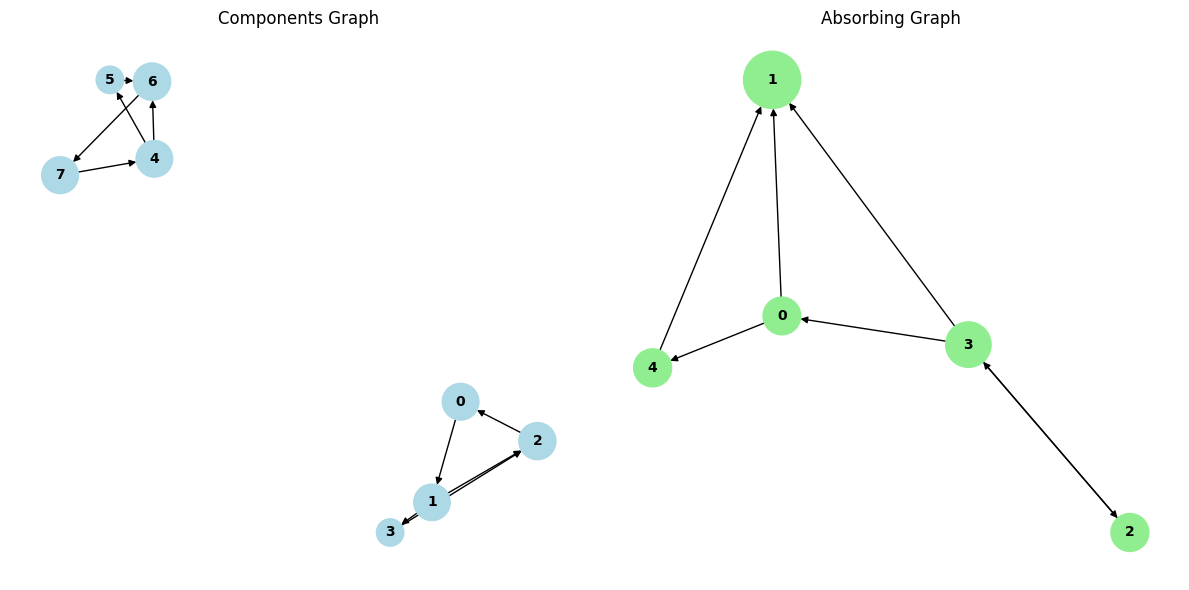

In [4]:
### Answers to the question:
# Once we add random restarts and deal with dangling nodes, every node in the graph can be reached eventually, and no node has zero PageRank.
# So yes it makes intuitive sense!

### Results:
# components:
# {0: 0.14117, 1: 0.13796, 2: 0.14318, 3: 0.0778, 4: 0.13783, 5: 0.07721, 6: 0.14381, 7: 0.14104}

# absorbing:
# {0: 0.14846, 1: 0.33943, 4: 0.14854, 2: 0.14939, 3: 0.21418}

### Code:

def random_surfer(G, num_steps=100000, alpha=0.15):
    visit_count = {node: 0 for node in G.nodes()}
    nodes = list(G.nodes())
    current_node = np.random.choice(nodes)

    for _ in range(num_steps):
        visit_count[current_node] += 1
        if np.random.rand() < alpha or len(list(G.successors(current_node))) == 0:
            current_node = np.random.choice(G.nodes())  # random restart
        else:
            current_node = np.random.choice(list(G.successors(current_node)))
    
    # Normalization to get PageRank scores
    pagerank_scores = {node: count / num_steps for node, count in visit_count.items()}
    return pagerank_scores

# Run for components graph
components_graph = load_graph("../../ix-lab2-files-2025/data/components.graph")
components_pagerank = random_surfer(components_graph)
print("Components graph PageRank:")
print(components_pagerank)

# Run for absorbing graph
absorbing_graph = load_graph("../../ix-lab2-files-2025/data/absorbing.graph")
absorbing_pagerank = random_surfer(absorbing_graph)
print("Absorbing graph PageRank:")
print(absorbing_pagerank)

# Visualizing the graphs
plt.figure(figsize=(12, 6))

plt.subplot(121)
nx.draw(components_graph, with_labels=True, node_color='lightblue',
        node_size=[v*5000 for v in components_pagerank.values()],
        font_size=10, font_weight='bold')
plt.title("Components Graph")

plt.subplot(122)
nx.draw(absorbing_graph, with_labels=True, node_color='lightgreen',
        node_size=[v*5000 for v in absorbing_pagerank.values()],
        font_size=10, font_weight='bold')
plt.title("Absorbing Graph")

plt.tight_layout()
plt.show()

---

### 2.4.2 Power Iteration Method

#### Exercise 2.14: Power Iteration method

In [3]:
### Answers to the question:
# Top 10 nodes:
# Node 5210 ("United States") => rank = 0.007460
# Node 5201 ("United Kingdom") => rank = 0.005165
# Node 2034 ("France") => rank = 0.004987
# Node 1890 ("Europe") => rank = 0.004470
# Node 2168 ("Germany") => rank = 0.003953
# Node 1811 ("England") => rank = 0.003841
# Node 5477 ("World War II") => rank = 0.003712
# Node 2999 ("Latin") => rank = 0.003599
# Node 2619 ("India") => rank = 0.003584
# Node 1818 ("English language") => rank = 0.003371

### Code:

G = load_graph_adj_matrix("../../ix-lab2-files-2025/data/wikipedia.graph")

# Calculate PageRank
scores = power_iteration(G, alpha=0.85)

top10 = sorted(scores.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 nodes:")

# Used to get the title of the nodes instead of their ID
title_map = load_titles("../../ix-lab2-files-2025/data/wikipedia_titles.tsv")

for node_id, rank in top10:
    title = title_map.get(node_id, "Unknown page") # Deal with unknown pages because we're fancy
    print(f"Node {node_id} (\"{title}\") => rank = {rank:.6f}")


Top 10 nodes:
Node 5210 ("United States") => rank = 0.007460
Node 5201 ("United Kingdom") => rank = 0.005165
Node 2034 ("France") => rank = 0.004987
Node 1890 ("Europe") => rank = 0.004470
Node 2168 ("Germany") => rank = 0.003953
Node 1811 ("England") => rank = 0.003841
Node 5477 ("World War II") => rank = 0.003712
Node 2999 ("Latin") => rank = 0.003599
Node 2619 ("India") => rank = 0.003584
Node 1818 ("English language") => rank = 0.003371


---

### 2.4.3 Gaming the system *(Bonus)*

#### Exercise 2.15 *(Bonus)*

In [4]:
# Answers to the question:
# Original PageRank: 0.000098
# Improved PageRank: 0.004660

# Explanation:
# To boost the PageRank of a page, you need to get as many high-ranking pages to link to it as possible.
# This makes intuitive sense because PageRank is heavily influenced by incoming links from already high-ranked nodes.

# Implementation:

# 1) Compute all the PageRank scores for the nodes in the graph.
# 2) Select the 300 top nodes by PageRank score.
# 3) Add edges from each of these nodes to the "History of mathematics".
# 4) Recompute the PageRank scores.

# Code:


G = load_graph2('../../ix-lab2-files-2025/data/wikipedia.graph')
titles = load_titles('../../ix-lab2-files-2025/data/wikipedia_titles.tsv')

# Find the node ID for "History of mathematics"
target_node_id = None
for idx, text in titles.items():
    if text.strip() == "History of mathematics":
        target_node_id = str(idx)  # Because G has string nodes
        break

# Don't ask why I had this, the debugging of this was intense...
if target_node_id is None:
    raise ValueError("Could not find 'History of mathematics' in titles!")

# Game the PageRank by adding 300 edges from the top-ranked nodes to History of mathematics
original_score, improved_score = game_pagerank(G, target_node_id, 300)
print(f"Original PageRank: {original_score:.6f}")
print(f"Improved PageRank: {improved_score:.6f}")


Original PageRank: 0.000098
Improved PageRank: 0.004660
